In [8]:
import pandas as pd
import numpy as np
df = pd.read_excel("demographics.xlsx")


In [9]:
df.isna().sum()

subject                0
scan-number            0
HC-AUD-match         261
subject-group          0
Study                  0
Diagnosis              0
Age                    2
age-subject-group      2
Sex                    0
AUDIT-Total          287
MMSE                 264
dtype: int64

In [10]:
df

,subject,scan-number,HC-AUD-match,subject-group,Study,Diagnosis,Age,age-subject-group,Sex,AUDIT-Total,MMSE
0,002_S_4171,1,NaN,AD-MCI,ADNI,MCI,69.00,elderly,M,NaN,24.0
1,002_S_4229,1,NaN,AD-MCI,ADNI,MCI,66.00,elderly,M,NaN,29.0
2,002_S_4473,1,NaN,AD-MCI,ADNI,MCI,75.00,elderly,M,NaN,27.0
3,002_S_4521,1,NaN,AD-MCI,ADNI,MCI,70.00,elderly,M,NaN,27.0
4,002_S_4799,1,NaN,AD-MCI,ADNI,MCI,68.00,elderly,M,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...
310,1125R2,2,NaN,HC,IAM,HC,63.07,mid-life,F,NaN,NaN
311,1126R2,2,NaN,HC,IAM,HC,76.70,elderly,M,NaN,NaN
312,1127R2,2,NaN,HC,IAM,HC,56.98,mid-life,F,NaN,NaN
313,1128R2,2,NaN,HC,IAM,HC,55.37,mid-life,M,NaN,NaN


In [11]:
df.dtypes

subject               object
scan-number            int64
HC-AUD-match         float64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
AUDIT-Total          float64
MMSE                 float64
dtype: object

In [12]:
import numpy as np
temp_df = df.drop(labels=['HC-AUD-match','AUDIT-Total','MMSE'],axis='columns')
new_df = temp_df.dropna(axis='index',how='any')

In [13]:
new_df.isna().sum()

subject              0
scan-number          0
subject-group        0
Study                0
Diagnosis            0
Age                  0
age-subject-group    0
Sex                  0
dtype: int64

In [14]:
df['Study'].value_counts()

IAM               236
ADNI               51
PATRIOT            11
COUPLES             7
PANACEA             6
PATRIOT-prelim      3
HEART               1
Name: Study, dtype: int64

In [15]:
df['Study'].unique()

array(['ADNI', 'HEART', 'COUPLES', 'PANACEA', 'PATRIOT-prelim', 'PATRIOT',
       'IAM'], dtype=object)

In [16]:
df['Diagnosis'].unique()

array(['MCI', 'AD', 'AUD', 'HC'], dtype=object)

In [17]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [18]:
df['subject-group'].value_counts()

HC        248
AD-MCI     39
AUD        28
Name: subject-group, dtype: int64

In [19]:
df['age-subject-group'].value_counts()

elderly     163
mid-life    150
Name: age-subject-group, dtype: int64

In [20]:
new_df.dtypes

subject               object
scan-number            int64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
dtype: object

OUTLIERS REMOVAL HERE

In [21]:

import pandas as pd
import numpy as np

df = pd.DataFrame(columns=['scan-number', 'Age'])  # create an empty DataFrame

# populate the DataFrame with some random data
for i in range(100):
    df.loc[i] = [np.random.randint(1, 100), np.random.randint(20, 80)]

for col_name in ['scan-number', 'Age']:
    col_mean = np.mean(df[col_name])
    col_std = np.std(df[col_name])
    cut_off = col_std * 3
    lower, upper = col_mean - cut_off, col_mean + cut_off
    print(lower, upper)
    df = df[(df[col_name] > lower) & (df[col_name] < upper)]  # remove outliers
    outliers_removed = [df.iloc[x] for x in range(len(df)) if (df[col_name].iloc[x] > lower) and (df[col_name].iloc[x] < upper)]




-33.88364436246062 128.12364436246062
-1.8259871065449573 106.44598710654496


In [22]:
new_df.describe()

,scan-number,Age
count,313.000000,313.000000
mean,1.373802,65.703003
std,0.484587,9.781700
min,1.000000,45.000000
25%,1.000000,58.020000
50%,1.000000,66.750000
75%,2.000000,73.000000
max,2.000000,84.660000


In [23]:
new_df.corr()

,scan-number,Age
scan-number,1.000000,0.014381
Age,0.014381,1.000000


In [24]:
new_df.dtypes

subject               object
scan-number            int64
subject-group         object
Study                 object
Diagnosis             object
Age                  float64
age-subject-group     object
Sex                   object
dtype: object

In [25]:
new_df

,subject,scan-number,subject-group,Study,Diagnosis,Age,age-subject-group,Sex
0,002_S_4171,1,AD-MCI,ADNI,MCI,69.00,elderly,M
1,002_S_4229,1,AD-MCI,ADNI,MCI,66.00,elderly,M
2,002_S_4473,1,AD-MCI,ADNI,MCI,75.00,elderly,M
3,002_S_4521,1,AD-MCI,ADNI,MCI,70.00,elderly,M
4,002_S_4799,1,AD-MCI,ADNI,MCI,68.00,elderly,M
...,...,...,...,...,...,...,...,...
309,1124R2,2,HC,IAM,HC,62.85,mid-life,M
310,1125R2,2,HC,IAM,HC,63.07,mid-life,F
311,1126R2,2,HC,IAM,HC,76.70,elderly,M
312,1127R2,2,HC,IAM,HC,56.98,mid-life,F


(array([12., 23., 27., 36., 50., 31., 52., 40., 21., 21.]),
 array([45.   , 48.966, 52.932, 56.898, 60.864, 64.83 , 68.796, 72.762,
        76.728, 80.694, 84.66 ]),
 <BarContainer object of 10 artists>)

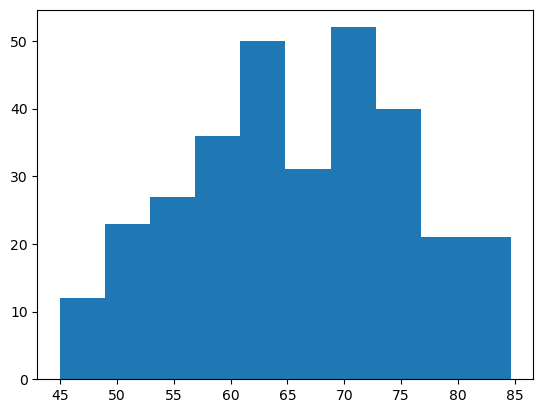

In [26]:
import matplotlib.pyplot as plt
plt.hist(new_df['Age'])

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

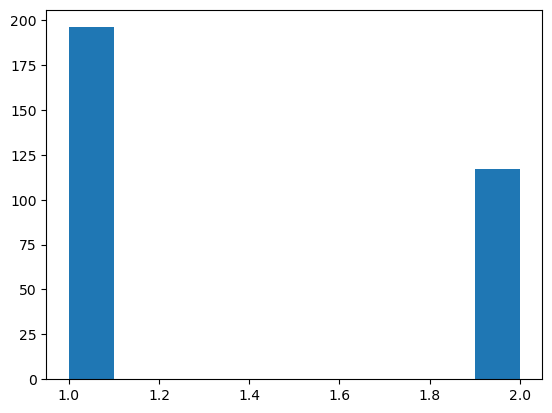

In [27]:
plt.hist(new_df['scan-number'])

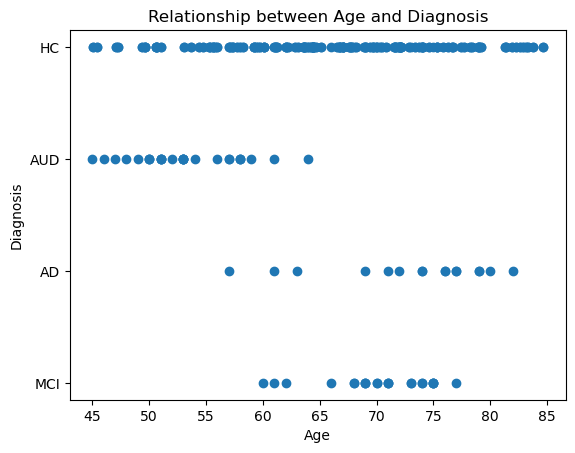

       Age Diagnosis
0    69.00       MCI
1    66.00       MCI
2    75.00       MCI
3    70.00       MCI
4    68.00       MCI
..     ...       ...
309  62.85        HC
310  63.07        HC
311  76.70        HC
312  56.98        HC
313  55.37        HC

[313 rows x 2 columns]


In [39]:

plt.scatter(new_df['Age'], new_df['Diagnosis'])
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.title('Relationship between Age and Diagnosis')
plt.show()
print(new_df[['Age', 'Diagnosis']])

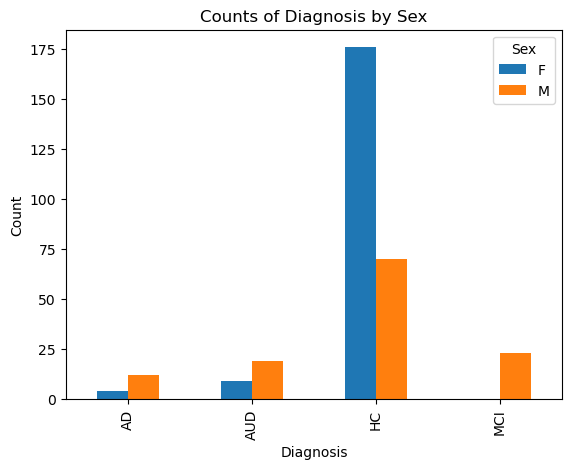

Sex            F     M
Diagnosis             
AD           4.0  12.0
AUD          9.0  19.0
HC         176.0  70.0
MCI          NaN  23.0


In [37]:
import matplotlib.pyplot as plt

# create a pivot table with counts of Diagnosis by Sex
sex_pivot = new_df.pivot_table(index='Diagnosis', columns='Sex', values='Age', aggfunc='count')

# plot the bar chart
sex_pivot.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Counts of Diagnosis by Sex')
plt.show()

# print the pivot table
print(sex_pivot)
